Two type of heirarchical clustering:
    Agglomerative - bottom-up approach
    Divisive - up-down approach

1. Agglomerative:
    step 1: Make each data point a single-point cluster => That forms N clusters
    step 2: Take the two closest data points and make them one cluster => That forms N-1 clusters
    step 3: Take the two closest clusters and make them one cluster => That forms N-2 clusters
    step 4: Repeat step 3 until there is only one cluster

To find two closest clusters how do you measure distance between 2 ?
- There are multiple options as below:
    1. Distance between closest points of 2 clusters
    2. Distance between furthest points of 2 clusters
    3. Average of the distance between all the respctive points
    4. Distance between centroids
  Based on the business problem, we need to choose which one is the most appropriate

The way hierarchical clusters works is it stores each step in memory - dendograms contains memory of the hierarchical cluster form


You can set the thresold in dendograms to obtain the optimal number of clusters.

Find the longest line that doesn't cross any horizontal line
set a thresold that crosses that longest line. you can set it lower or higher on that longest line
This is one of the approaches to find the optimal number of clusters

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
hierarchical_data = pd.read_csv('hierarchical_data.csv')
hierarchical_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
#Goal - segment customers based on their income and spending score
X = hierarchical_data.iloc[:,[3,4]].values

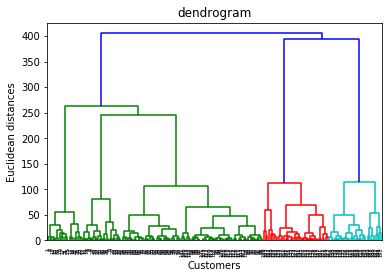

In [6]:
#Using the dendrograms to find the optimal number of clusters
import scipy.cluster.hierarchy as sch #scipy is a library to create clusters and dendrograms
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) 
#ward method tries to minimize the variance within each cluster

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The largest distance(longest line), we find here is 2nd big green line. hence we obtain 5 clusters which matches the result of KMeans clustering as well.

Note that even half lines can be considered if they are still the longest

In [8]:
#Fit hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward') #affinity = type of distance calc
y_hc = hc.fit_predict(X)

In [9]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

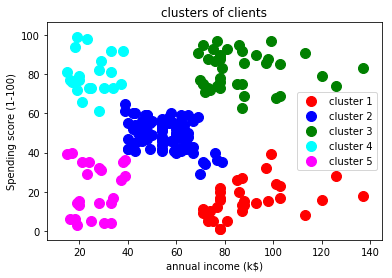

In [10]:
#Visualizing the clusters
plt.scatter(X[y_hc ==0, 0], X[y_hc == 0,1], s = 100, c = 'red', label = 'cluster 1') # s is size 
#we want the first cluster and hence we specify kmeans = 0 and we choose the first column of X as x co-ordinate, 
#similary for our 2nd argument we choose 2nd column of X as y coordinate
plt.scatter(X[y_hc ==1, 0], X[y_hc == 1,1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_hc ==2, 0], X[y_hc == 2,1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(X[y_hc ==3, 0], X[y_hc == 3,1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[y_hc ==4, 0], X[y_hc == 4,1], s = 100, c = 'magenta', label = 'cluster 5')

plt.title('clusters of clients')
plt.xlabel('annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

In [ ]:
#Observations:
Cluster 1: Clients in cluster 1 have high income and low spending score
Cluster 2: Average income and average spending score
Cluster 3: high income and high spending score - target
cluster 4: low income and high spending score
cluster 5: low income and low spending score